# **Load dataset**

In [ ]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: create a string directory to My Drive/ML datasets
import pandas as pd
import os

dataset_dir = "/content/drive/My Drive/ML datasets/IMDB-Dataset.csv"

# Create the directory if it doesn't exist
df = pd.read_csv(dataset_dir)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **Cleaning and EDA data**

In [ ]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.2 MB/s eta 0:00:00


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop = set(stopwords.words('english'))
wl = WordNetLemmatizer()

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):
    # Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Expand contractions (e.g., "can't" to "cannot")
    text = expand_contractions(text)

    # Remove emojis
    emoji_clean = re.compile(
        u'['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+', flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)

    # Add space after full stop if it's missing
    text = re.sub(r'\.(?=\S)', '. ', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation and convert to lowercase
    text = "".join([word.lower() for word in text if word not in string.punctuation])

    # Remove stopwords and non-alphabetical characters, and apply lemmatization
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])

    return text

# Assuming df is your dataframe with the 'review' column
df['review'] = df['review'].apply(preprocess_text)

# Check the cleaned data
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive


In [ ]:
# prompt: calculate the total class in sentiment field

sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
total_reviews = len(df)
print(f"Total number of reviews: {total_reviews}")


sentiment
positive    25000
negative    25000
Name: count, dtype: int64
Total number of reviews: 50000


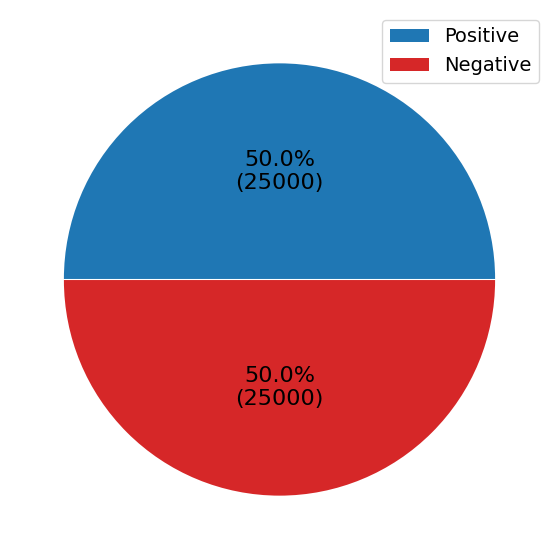

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to format the percentage and absolute count in the pie chart
def func(pct, allvalues):
    # Calculate the absolute value based on the percentage
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Calculate the frequency of positive and negative sentiment labels
freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

# Prepare the data for the pie chart (frequencies of positive and negative sentiment)
data = [freq_pos, freq_neg]

# Set the labels for the pie chart
labels = ['positive', 'negative']

# Create a figure and an axis for the pie chart
pie, ax = plt.subplots(figsize=[11, 7])

# Create the pie chart
plt.pie(
    x=data,  # The data values (positive vs. negative counts)
    autopct=lambda pct: func(pct, data),  # Function to format the percentage and count
    explode=[0.0025]*2,  # Slightly "explode" both sections for better visibility
    pctdistance=0.5,  # Position the percentage text inside the pie chart
    colors=[sns.color_palette()[0], 'tab:red'],  # Custom colors for the slices
    textprops={'fontsize': 16}  # Set the font size for the text inside the chart
)

# Optional: Add a title (uncomment the next line if you'd like a title)
# plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')

# Define the labels for the legend
labels = [r'Positive', r'Negative']

# Add the legend to the pie chart
plt.legend(labels, loc="best", prop={'size': 14})

# Save the pie chart as a PNG image
pie.savefig("PieChart.png")

# Display the pie chart
plt.show()


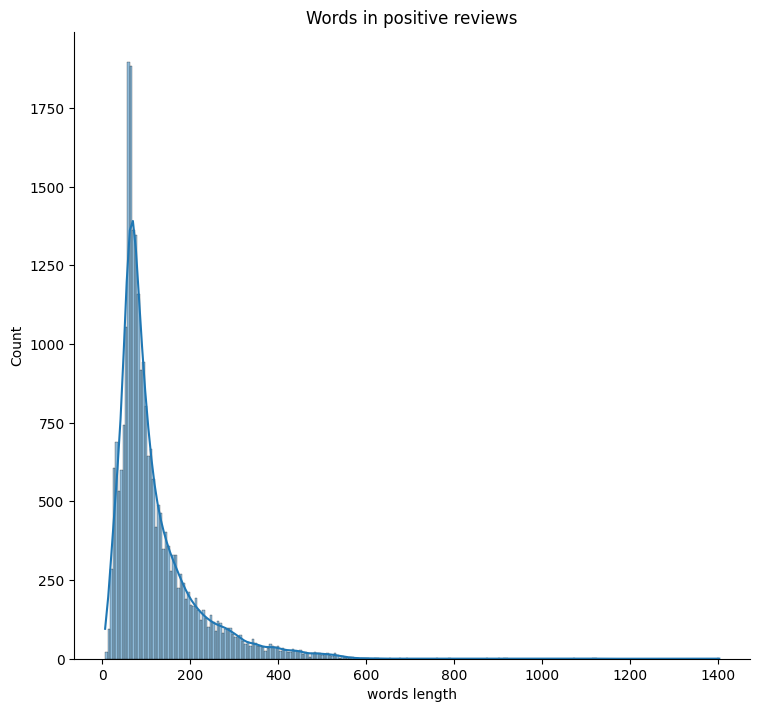

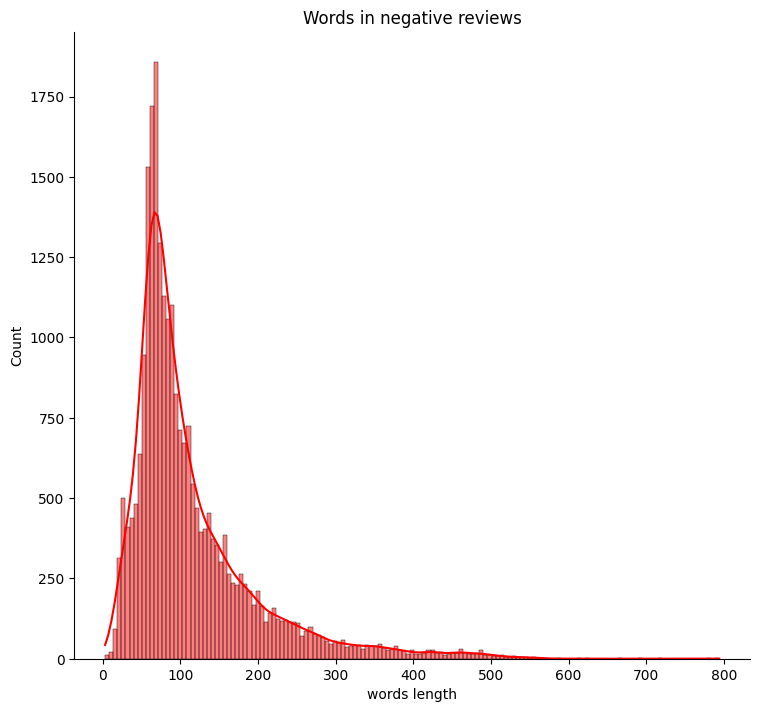

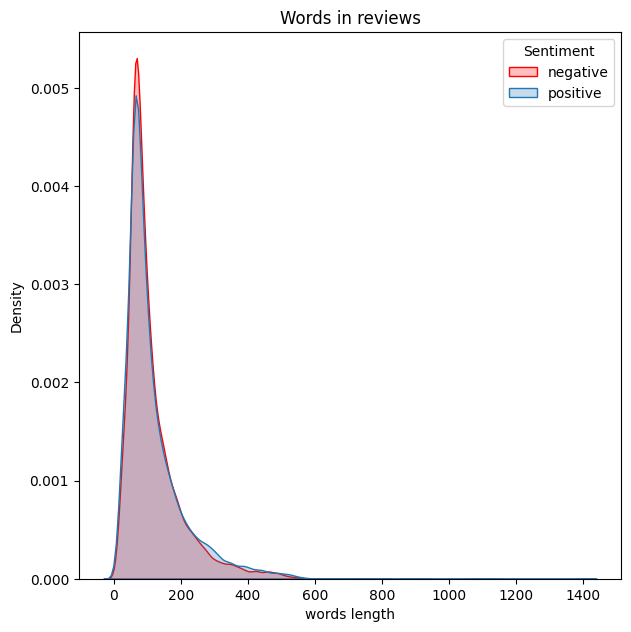

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the length (in words) of each review in the dataframe
words_len = df['review'].str.split().map(lambda x: len(x))

# Create a temporary copy of the dataframe to store the word lengths
df_temp = df.copy()

# Add the calculated word length to the dataframe
df_temp['words length'] = words_len

# Create a histogram for word lengths in positive reviews
hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],  # Filter positive sentiment reviews
    x="words length",  # The variable to plot (word length)
    hue="sentiment",  # Color by sentiment
    kde=True,  # Add a Kernel Density Estimate (KDE) curve
    height=7,  # Height of the figure
    aspect=1.1,  # Aspect ratio of the figure
    legend=False  # Do not display the legend
).set(title='Words in positive reviews')  # Set the title of the plot
plt.show(hist_positive)  # Show the histogram

# Create a histogram for word lengths in negative reviews
hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],  # Filter negative sentiment reviews
    x="words length",  # The variable to plot (word length)
    hue="sentiment",  # Color by sentiment
    kde=True,  # Add a Kernel Density Estimate (KDE) curve
    height=7,  # Height of the figure
    aspect=1.1,  # Aspect ratio of the figure
    legend=False,  # Do not display the legend
    palette=['red']  # Set the color for the negative sentiment (red)
).set(title='Words in negative reviews')  # Set the title of the plot
plt.show(hist_negative)  # Show the histogram

# Create a KDE plot to show the distribution of word lengths for both sentiments
plt.figure(figsize=(7, 7.1))  # Set the figure size
kernel_distibution_number_words_plot = sns.kdeplot(
    data=df_temp,  # Use the full dataframe
    x="words length",  # The variable to plot (word length)
    hue="sentiment",  # Color by sentiment
    fill=True,  # Fill the area under the curve
    palette=[sns.color_palette()[0], 'red']  # Set colors for positive and negative sentiments
).set(title='Words in reviews')  # Set the title of the plot

# Add a legend with custom labels
plt.legend(title='Sentiment', labels=['negative', 'positive'])

# Show the KDE plot
plt.show(kernel_distibution_number_words_plot)


# **Spliting data**

In [ ]:
from sklearn.model_selection import train_test_split  # Import the function to split the dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # Import the TF-IDF vectorizer for text features
from sklearn.preprocessing import LabelEncoder  # Import the LabelEncoder to encode labels

# Initialize the LabelEncoder for sentiment encoding
label_encode = LabelEncoder()

# Encode the sentiment labels (positive = 1, negative = 0)
y_data = label_encode.fit_transform(df['sentiment'])  # Apply encoding to the 'sentiment' column

# Initialize the TfidfVectorizer with a maximum of 10,000 features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Apply the vectorizer to the 'review' column to convert the text into numerical features
x_data = tfidf_vectorizer.fit_transform(df['review'])  # Fit and transform the raw text data

# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(
    x_data,  # Features (TF-IDF vectors)
    y_data,  # Target labels (encoded sentiments)
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42  # Set a random seed for reproducibility
)


# **Classifiers**

## **Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree classifier
from sklearn.metrics import accuracy_score, classification_report  # For evaluating the model

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
dt_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(x_test)

# Evaluate the model: Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy for decision tree: {accuracy_dt:.4f}")

# Detailed evaluation: Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy for decision tree: 0.7254
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4961
           1       0.73      0.73      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



## **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier
from sklearn.metrics import accuracy_score, classification_report  # For evaluating the model

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model using the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model: Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random forest): {accuracy_rf:.4f}")

# Detailed evaluation: Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy (Random forest): 0.8526
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4961
           1       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoost classifier
from sklearn.tree import DecisionTreeClassifier  # Import base decision tree for AdaBoost
from sklearn.metrics import accuracy_score, classification_report  # For evaluating the model

# Initialize the AdaBoost classifier with default decision tree (base estimator) of max_depth=1
ada_model = AdaBoostClassifier(
                               n_estimators=100, random_state=42)

# Train the model using the training data
ada_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_ada = ada_model.predict(x_test)

# Evaluate the model: Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy (AdaBoost): {accuracy_ada:.4f}")

# Detailed evaluation: Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))


Accuracy (AdaBoost): 0.7756
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      4961
           1       0.77      0.80      0.78      5039

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



## **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  # Import Gradient Boosting classifier
from sklearn.metrics import accuracy_score, classification_report  # For evaluating the model

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
gb_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(x_test)

# Evaluate the model: Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy (Gradient Boosting): {accuracy_gb:.4f}")

# Detailed evaluation: Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))


Accuracy (Gradient Boosting): 0.8130
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      4961
           1       0.79      0.87      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



## **XGBoost**

In [ ]:
pip install xgboost


In [ ]:
import xgboost as xgb  # Import the XGBoost library
from sklearn.metrics import accuracy_score, classification_report  # For evaluating the model

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False)

# Train the model using the training data
xgb_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the model: Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {accuracy_xgb:.4f}")

# Detailed evaluation: Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:09:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (XGBoost): 0.8591
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

